Create your own model of regression

Sequence of actions are:
0. Mount your online disk. Import needed libraries.
1. Take a dataset
2. Watch structure of data set.
3. Take list of the names of columns.
4. Take only numeric variables to correlation analisys
5. Make the correlation analisys.
6. Choose the target variable.
7. By Correlation analisys take 4-5 most fluent variables for target variable.
8. Create and fit the model.
9. Use the model for prediction.
10. Check absolute error.


In [9]:
# Step 0: Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [10]:
# Step 1: Take a dataset
file_path = 'weatherHistory.csv'
weather_data = pd.read_csv(file_path, on_bad_lines='skip')  # Skip lines with errors

weather_data.head()

<ipython-input-10-72862f9f62a2>:3: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_data = pd.read_csv(file_path, on_bad_lines='skip')  # Skip lines with errors


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.826300000000002,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.826300000000002,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.826300000000002,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.826300000000002,0.0,1016.51,Partly cloudy throughout the day.


In [11]:
# Step 2: Watch structure of data set
weather_data.describe()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Loud Cover,Pressure (millibars)
count,129773.000000,129773.000000,129773.000000,129773.000000,129772.0,129772.000000
mean,10.849055,0.730856,10.929005,188.254229,0.0,1002.642484
std,10.728768,0.195493,7.003841,107.447388,0.0,118.800685
min,-27.716667,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.327778,0.600000,5.908700,115.000000,0.0,1011.670000
50%,12.022222,0.780000,10.143000,181.000000,0.0,1016.300000
75%,18.844444,0.890000,14.232400,290.000000,0.0,1021.092500
max,39.344444,1.000000,63.852600,359.000000,0.0,1046.380000


In [13]:
# Step 3: Take list of the names of columns
weather_data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [15]:
# Step 4: Take only numeric variables to correlation analysis
numeric_data = weather_data.select_dtypes(include=[np.number])
numeric_data

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Loud Cover,Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,0.0,1015.13
1,7.227778,0.86,14.2646,259.0,0.0,1015.63
2,9.377778,0.89,3.9284,204.0,0.0,1015.94
3,5.944444,0.83,14.1036,269.0,0.0,1016.41
4,6.977778,0.83,11.0446,259.0,0.0,1016.51
...,...,...,...,...,...,...
129770,12.016667,0.39,3.5903,353.0,0.0,1025.44
129771,11.083333,0.43,0.3864,290.0,0.0,1024.82
129772,8.816667,0.54,0.3703,270.0,0.0,1024.61
129773,6.216667,0.63,1.8193,265.0,0.0,1024.64


Correlation matrix:
                           Apparent Temperature (C)  Humidity  \
Apparent Temperature (C)                  1.000000 -0.604080   
Humidity                                 -0.604080  1.000000   
Wind Speed (km/h)                        -0.060523 -0.224189   
Wind Bearing (degrees)                    0.021467  0.002127   
Loud Cover                                     NaN       NaN   
Pressure (millibars)                     -0.008156  0.002372   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Apparent Temperature (C)          -0.060523                0.021467   
Humidity                          -0.224189                0.002127   
Wind Speed (km/h)                  1.000000                0.117147   
Wind Bearing (degrees)             0.117147                1.000000   
Loud Cover                              NaN                     NaN   
Pressure (millibars)              -0.046171               -0.008393   

                          Loud C

<Axes: >

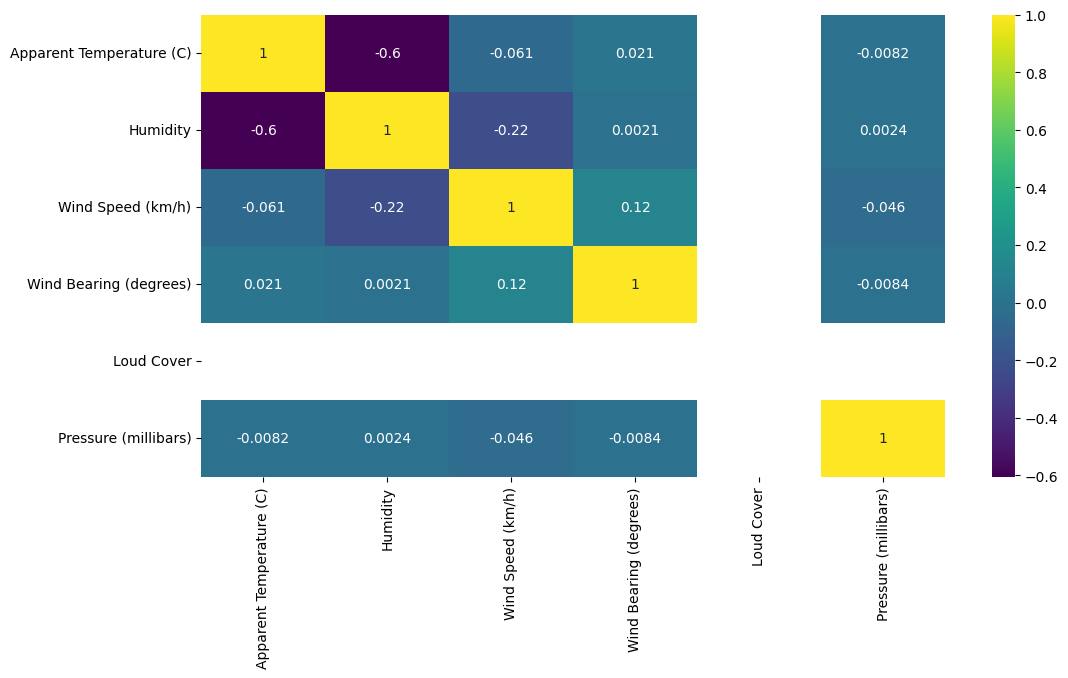

In [18]:
# Step 5 : Make the correlation analysis
correlation_matrix = numeric_data.corr()
print("Correlation matrix:\n", correlation_matrix)
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(correlation_matrix,cmap='viridis', annot=True)

In [19]:
coefficients_of_variation = numeric_data.std() / numeric_data.mean()

# Display the coefficients of variation
print("Coefficients of Variation:\n", coefficients_of_variation)

Coefficients of Variation:
 Apparent Temperature (C)    0.988913
Humidity                    0.267485
Wind Speed (km/h)           0.640849
Wind Bearing (degrees)      0.570757
Loud Cover                       NaN
Pressure (millibars)        0.118488
dtype: float64


In [20]:
# Step 6: Choose the target variable
# As 'Daily Summary' is not numeric, I'll assume 'Wind Speed (km/h)' for this example
target_variable = 'Wind Speed (km/h)'
target_variable

'Wind Speed (km/h)'

In [21]:
# Step 7: By Correlation analysis take 4-5 most influential variables for target variable
influential_variables = correlation_matrix[target_variable].sort_values(ascending=False).index[1:5].tolist()
print("Most influential variables for target:", influential_variables)

Most influential variables for target: ['Wind Bearing (degrees)', 'Pressure (millibars)', 'Apparent Temperature (C)', 'Humidity']


In [24]:
# Step 8: Create and fit the model
X = numeric_data[influential_variables]
y = numeric_data[target_variable]

# Handle missing values (NaN) using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # You can choose a different strategy if needed
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Step 9: Use the model for prediction
y_pred = model.predict(X_test)
y_pred

array([11.14934154,  7.39698734, 11.46719929, ..., 12.61154529,
        7.02190472, 13.30488824])

In [27]:
# Step 10: Check absolute error


# Handle missing values (NaN) using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # You can choose a different strategy if needed
X = imputer.fit_transform(X)

# Impute missing values in the target variable as well
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel() # Reshape and flatten to match original format

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
absolute_error = mean_absolute_error(y_test, y_pred)
print("Absolute Error:", absolute_error)

Absolute Error: 4.98290019368731


Coefficient of Variation for original data points: 0.6383160670569024
Coefficient of Variation for predictions: 0.2283685085321413


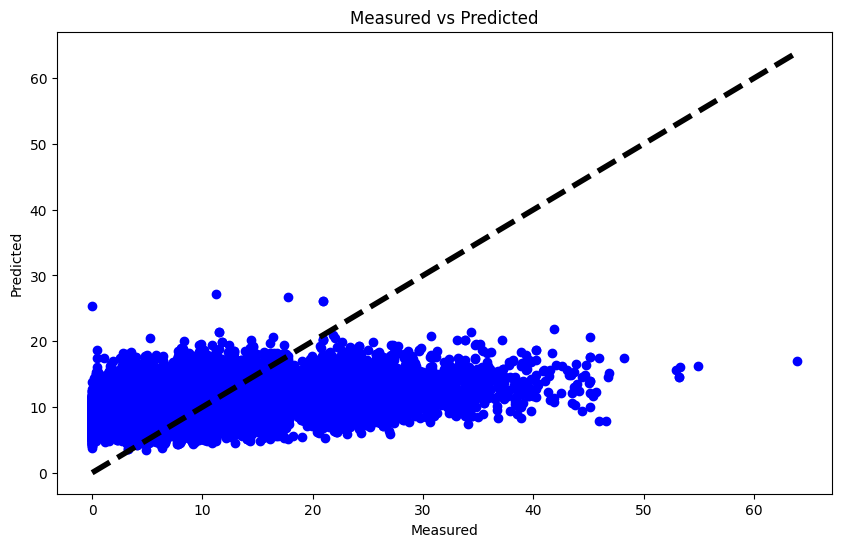

In [28]:
# Calculate coefficient of variation for the original data points and predictions
cv_original = np.std(y_test) / np.mean(y_test)
cv_predictions = np.std(y_pred) / np.mean(y_pred)

print("Coefficient of Variation for original data points:", cv_original)
print("Coefficient of Variation for predictions:", cv_predictions)

# Plotting the results
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted')
plt.show()